In [2]:
#Load the required libraries and read the dataset.

In [4]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Step 2: Load the dataset
data = pd.read_csv('renttherunway.csv')




In [ ]:
#Check the first few samples, shape, info of the data and try to familiarize
 #yourself with different features

In [5]:
# Display first few samples, shape, and info
print(data.head())
print(data.shape)
print(data.info())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [ ]:
# Data cleansing and Exploratory data analysis:
 #Check if there are any duplicate records in the dataset?

In [6]:
# Step 3: Check for duplicate records
duplicates = data.duplicated().sum()
print(f'Duplicate records: {duplicates}')
data = data.drop_duplicates()


Duplicate records: 0


In [ ]:
#Drop the columns which you think redundant for the analysis.(Hint: drop
# columns like ‘id’, ‘review’) 

In [7]:
# Step 4: Drop redundant columns
data = data.drop(columns=['id', 'review_text'], errors='ignore')  # Assuming these columns exist


In [ ]:
#Check the column 'weight', Is there any presence of string data? If yes, remove
# the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [9]:
# Remove 'lbs' from 'weight' column and convert to float
data['weight'] = data['weight'].str.replace('lbs', '').str.strip().astype(float)


In [ ]:
 #Check the unique categories for the column 'rented for' and group 'party:
 #cocktail' category with 'party'.

In [10]:
# Group 'party: cocktail' with 'party'
data['rented for'] = data['rented for'].replace({'party: cocktail': 'party'})


In [ ]:
 #The column 'height' is in feet with a quotation mark, Convert to inches with
 #float datatype. 

In [15]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv('renttherunway.csv')

# Step 2: Clean the 'weight' column
# Convert the weight column to string and handle NaN
data['weight'] = data['weight'].astype(str).str.replace('lbs', '', regex=False).str.replace(' ', '', regex=False)

# Convert cleaned weight to float, handling errors (like empty strings)
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

# Step 3: Clean the 'height' column
def convert_height_to_inches(height):
    if isinstance(height, str):
        # Split the string and strip any extra whitespace
        feet, inches = map(str.strip, height.split("'"))
        # Convert feet and inches to integer
        return int(feet) * 12 + int(inches.replace('"', ''))
    return height  # Return NaN or non-string types unchanged

# Apply the function to the 'height' column
data['height'] = data['height'].apply(convert_height_to_inches)

# Step 4: Check the cleaned DataFrame
print(data[['weight', 'height']].head())

# Optional: Save the cleaned DataFrame to a new CSV file
data.to_csv('cleaned_renttherunway.csv', index=False)


   weight  height
0   137.0    68.0
1   132.0    66.0
2     NaN    64.0
3   135.0    65.0
4   145.0    69.0


In [ ]:
 #Check for missing values in each column of the dataset? If it exists, impute
 #them with appropriate methods.

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('renttherunway.csv')

# Step 1: Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Step 2: Clean the 'weight' column
data['weight'] = data['weight'].astype(str).str.replace('lbs', '', regex=False).str.replace(' ', '', regex=False)
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Step 3: Clean the 'height' column
def convert_height_to_inches(height):
    if isinstance(height, str):
        feet, inches = map(str.strip, height.split("'"))
        return int(feet) * 12 + int(inches.replace('"', ''))
    return height  # Return NaN or non-string types unchanged

data['height'] = data['height'].apply(convert_height_to_inches)

# Step 4: Impute missing values
# Impute missing 'weight' values with the median
if 'weight' in data.columns:
    data['weight'].fillna(data['weight'].median(), inplace=True)

# Impute missing 'height' values with the median
if 'height' in data.columns:
    data['height'].fillna(data['height'].median(), inplace=True)

# Impute missing categorical columns with mode or a placeholder
if 'bust size' in data.columns:
    data['bust size'].fillna(data['bust size'].mode()[0], inplace=True)

if 'body type' in data.columns:
    data['body type'].fillna(data['body type'].mode()[0], inplace=True)

if 'rating' in data.columns:
    data['rating'].fillna(data['rating'].mean(), inplace=True)  # Example for rating

if 'review_text' in data.columns:
    data['review_text'].fillna('No review', inplace=True)  # Placeholder for text reviews

if 'age' in data.columns:
    data['age'].fillna(data['age'].median(), inplace=True)  # Example for age

# Check for any remaining missing values
remaining_missing_values = data.isnull().sum()
print("\nRemaining missing values after imputation:")
print(remaining_missing_values)

# Optional: Save the imputed DataFrame to a new CSV file
data.to_csv('imputed_renttherunway.csv', index=False)


Missing values in each column:
Unnamed: 0            0
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_5580\2884677768.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weight'].fillna(data['weight'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_5580\2884677768.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Remaining missing values after imputation:
Unnamed: 0          0
fit                 0
user_id             0
bust size           0
item_id             0
weight              0
rating              0
rented for         10
review_text         0
body type           0
review_summary    347
category            0
height              0
size                0
age                 0
review_date         0
dtype: int64


In [ ]:
#Check the statistical summary for the numerical and categorical columns and
 #write your findings. 

In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('renttherunway.csv')

# Clean the weight and height columns as previously discussed
data['weight'] = data['weight'].astype(str).str.replace('lbs', '', regex=False).str.replace(' ', '', regex=False)
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

def convert_height_to_inches(height):
    if isinstance(height, str):
        feet, inches = map(str.strip, height.split("'"))
        return int(feet) * 12 + int(inches.replace('"', ''))
    return height

data['height'] = data['height'].apply(convert_height_to_inches)

# Generate statistical summary for numerical columns
numerical_summary = data.describe()

# Generate statistical summary for categorical columns
categorical_summary = {}
for column in data.select_dtypes(include=['object']).columns:
    categorical_summary[column] = data[column].value_counts()

# Display results
print("Statistical Summary for Numerical Columns:")
print(numerical_summary)

print("\nStatistical Summary for Categorical Columns:")
for column, counts in categorical_summary.items():
    print(f"\nValue counts for {column}:")
    print(counts)


Statistical Summary for Numerical Columns:
          Unnamed: 0        user_id       item_id         weight  \
count  192544.000000  192544.000000  1.925440e+05  162562.000000   
mean    96271.500000  499494.100149  1.045684e+06     137.391709   
std     55582.809453  289059.719328  8.053148e+05      21.899967   
min         0.000000       9.000000  1.233730e+05      50.000000   
25%     48135.750000  250654.250000  1.950760e+05     123.000000   
50%     96271.500000  499419.000000  9.483960e+05     135.000000   
75%    144407.250000  750974.000000  1.678888e+06     148.000000   
max    192543.000000  999997.000000  2.966087e+06     300.000000   

              rating         height           size            age  
count  192462.000000  191867.000000  192544.000000  191584.000000  
mean        9.092371      65.310621      12.245175      33.871017  
std         1.430044       2.663480       8.494877       8.058083  
min         2.000000      54.000000       0.000000       0.000000  
25% 

In [ ]:
#Are there outliers present in the column age? If yes, treat them with the
# appropriate method. 

In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('renttherunway.csv')

# Clean the 'age' column (if needed) and convert to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Step 1: Identify outliers using the IQR method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

print(f"Outliers in 'age' column:\n{outliers['age']}")

# Step 2: Treat outliers
# Option 1: Remove outliers
data_cleaned = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Option 2: Cap outliers
data['age'] = data['age'].clip(lower=lower_bound, upper=upper_bound)

# Summary of changes
print(f"\nTotal outliers detected: {outliers.shape[0]}")
print(f"\nCleaned data shape: {data_cleaned.shape}")

# Display cleaned data summary for age
print("\nSummary statistics for 'age' after treating outliers:")
print(data['age'].describe())


Outliers in 'age' column:
2         116.0
7          65.0
31         50.0
39         53.0
56         52.0
          ...  
192489     50.0
192495     55.0
192504     51.0
192517     55.0
192532     55.0
Name: age, Length: 10254, dtype: float64

Total outliers detected: 10254

Cleaned data shape: (181330, 16)

Summary statistics for 'age' after treating outliers:
count    191584.000000
mean         33.515643
std           6.970775
min          17.000000
25%          29.000000
50%          32.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64


In [ ]:
 #Check the distribution of the different categories in the column 'rented for'
 #using appropriate plot.

C:\Users\hp\AppData\Local\Temp\ipykernel_5580\1016984059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rented_for_counts.index, y=rented_for_counts.values, palette='viridis')


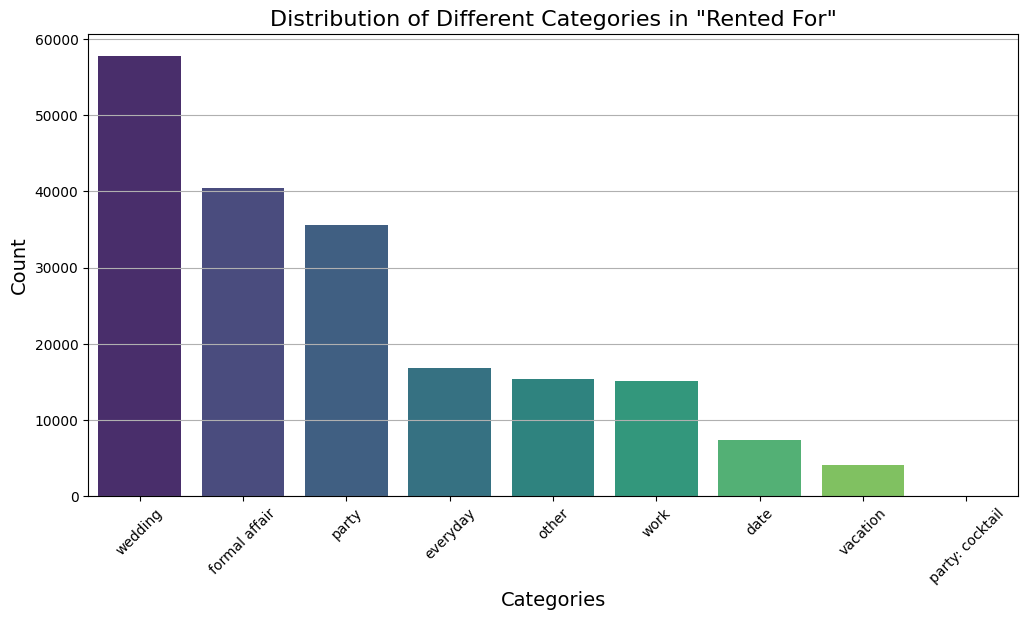

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('renttherunway.csv')

# Check the distribution of the 'rented for' column
rented_for_counts = data['rented for'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=rented_for_counts.index, y=rented_for_counts.values, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Different Categories in "Rented For"', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
 #Data Preparation for model building: 
 #12. Encode the categorical variables in the dataset.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load your dataset
data = pd.read_csv('C:/Users/hp/Downloads/car+data.csv')

# Step 1: Display the original data
print("Original Data:")
print(data.head(), "\n")

# Step 2: Encode categorical variables
le = LabelEncoder()
data['body type'] = le.fit_transform(data['body type'])
data['rented for'] = le.fit_transform(data['rented for'])
data['category'] = le.fit_transform(data['category'])

# Display the data after encoding
print("Data after Encoding Categorical Variables:")
print(data.head(), "\n")

# Step 3: Identify numerical columns for scaling
numerical_cols = ['weight', 'rating', 'height', 'size', 'age']

# Step 4: Standardization (Z-score Normalization)
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the standardized data
print("Standardized Data (Z-score Normalization):")
print(data[numerical_cols].head(), "\n")

# Step 5: Min-Max Normalization
min_max_scaler = MinMaxScaler()
data[numerical_cols] = min_max_scaler.fit_transform(data[numerical_cols])

# Display the normalized data
print("Normalized Data (Min-Max Scaling):")
print(data[numerical_cols].head())



In [ ]:
#Standardize the data, so that the values are within a particular range.

In [25]:
# Step 13: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Scale numerical data


In [ ]:
 #Principal Component Analysis and Clustering: 
 #14. Apply PCA on the above dataset and determine the number of PCA
 #components to be used so that 90-95% of the variance in data is explained by
 #the same.

In [32]:
#1. Import Required Libraries and Load Data
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load the dataset
data = pd.read_csv('C:/Users/hp/Downloads/renttherunway.csv')

# Display the first few samples, shape, and info of the data
print(data.head())
print(f"Shape of the data: {data.shape}")
print(data.info())


   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

Initial Data Shape: (192544, 16)
   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                             

C:\Users\hp\AppData\Local\Temp\ipykernel_5580\1152450739.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weight'].fillna(data['weight'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_5580\1152450739.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Remaining missing values after imputation:
 Unnamed: 0            0
fit                   0
user_id               0
bust size             0
item_id               0
weight                0
rating               82
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height                0
size                  0
age                   0
review_date           0
dtype: int64
Statistical Summary for Numerical Columns:
           Unnamed: 0        user_id       item_id         weight  \
count  192544.000000  192544.000000  1.925440e+05  192544.000000   
mean    96271.500000  499494.100149  1.045684e+06     137.019284   
std     55582.809453  289059.719328  8.053148e+05      20.141448   
min         0.000000       9.000000  1.233730e+05      50.000000   
25%     48135.750000  250654.250000  1.950760e+05     125.000000   
50%     96271.500000  499419.000000  9.483960e+05     135.000000   
75%    144407.250000  750974.000000  1.

C:\Users\hp\AppData\Local\Temp\ipykernel_5580\1152450739.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rented for', palette='viridis')


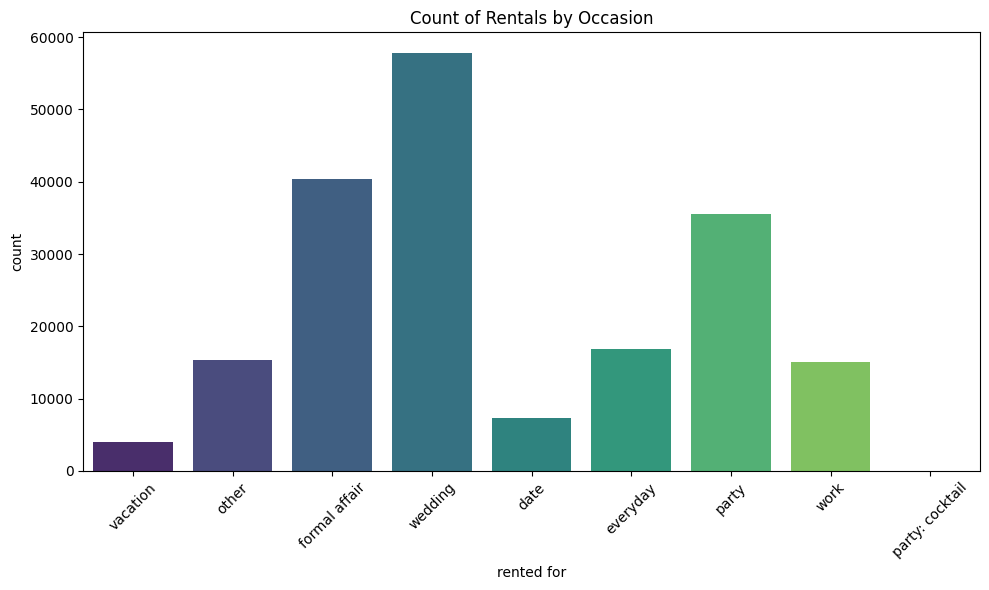

Cleaned data shape: (192479, 16)


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('renttherunway.csv')

# Display the initial shape of the data
print("Initial Data Shape:", data.shape)

# Display the first few rows of the dataset
print(data.head())

# Check for duplicate records
duplicates = data.duplicated().sum()
print("Duplicate records:", duplicates)

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Clean 'weight' column: remove 'lbs' and convert to numeric
if 'weight' in data.columns:
    data['weight'] = data['weight'].str.replace('lbs', '').astype(float)  # Remove 'lbs' and convert to float
    data['weight'].fillna(data['weight'].median(), inplace=True)

# Clean 'height' column: convert to inches
if 'height' in data.columns:
    # Function to convert height from '5\' 8"' to inches
    def convert_height(height_str):
        if pd.isnull(height_str):
            return None
        try:
            feet, inches = map(int, height_str.replace('"', '').split("'"))
            return feet * 12 + inches  # Convert to inches
        except ValueError:
            return None  # Handle cases that cannot be converted

    data['height'] = data['height'].apply(convert_height)
    data['height'].fillna(data['height'].median(), inplace=True)

# Fill missing values for other columns
if 'bust size' in data.columns:
    data['bust size'].fillna(data['bust size'].mode()[0], inplace=True)
if 'age' in data.columns:
    data['age'].fillna(data['age'].median(), inplace=True)

# Check remaining missing values after imputation
remaining_missing = data.isnull().sum()
print("Remaining missing values after imputation:\n", remaining_missing)

# Summary statistics for numerical columns
numerical_summary = data.describe()
print("Statistical Summary for Numerical Columns:\n", numerical_summary)

# Summary statistics for categorical columns
categorical_summary = data.describe(include=['object'])
print("Statistical Summary for Categorical Columns:\n", categorical_summary)

# Example of detecting outliers in 'age' column
age_outliers = data[data['age'] > 100]
print("Outliers in 'age' column:\n", age_outliers)

# Remove outliers (if necessary)
data = data[data['age'] <= 100]  # Adjust based on your criteria

# Summary statistics for 'age' after treating outliers
age_summary = data['age'].describe()
print("Summary statistics for 'age' after treating outliers:\n", age_summary)

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rented for', palette='viridis')
plt.title('Count of Rentals by Occasion')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Cleaned data shape
print("Cleaned data shape:", data.shape)

# Save cleaned data to a new CSV file (optional)
data.to_csv('cleaned_renttherunway.csv', index=False)  # Save as a new file
